In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
wth = pd.read_csv("weatherAUS.csv")
wth = wth.dropna()
test = pd.read_csv("aus_test.csv")
test = test.dropna()

In [ ]:
X = wth[['Location', 'MinTemp', 'MaxTemp', 'Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am','Humidity9am', 'Humidity3pm', 'Pressure9am','Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp3pm','RainToday', 'WindDir9am', 'WindGustDir', 'WindDir3pm' ]]
Y = wth['RainTomorrow']

In [ ]:
X_test = test[['Location', 'MinTemp', 'MaxTemp', 'Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am','Humidity9am', 'Humidity3pm', 'Pressure9am','Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp3pm','RainToday', 'WindDir9am', 'WindGustDir', 'WindDir3pm'  ]]
Y_test= test['RainTomorrow']

In [ ]:
#date = wth.Datem
#date_t = test.Datem

In [ ]:
avg = np.average(X.Location), np.average(X.MinTemp), np.average(X.MaxTemp), np.average(X.Rainfall), np.average(X.Evaporation), np.average(X.Sunshine), np.average(X.WindGustSpeed), np.average(X.WindSpeed9am), np.average(X.Humidity9am), np.average(X.Humidity3pm), np.average(X.Pressure9am), np.average(X.Pressure3pm), np.average(X.Cloud9am), np.average(X.Cloud3pm), np.average(X.Temp3pm), np.average(X.RainToday), np.average(X.WindDir9am), np.average(X.WindGustDir), np.average(X.WindDir3pm)

In [ ]:
avg_t = np.average(X.Location), np.average(X.MinTemp), np.average(X.MaxTemp), np.average(X.Rainfall), np.average(X.Evaporation), np.average(X.Sunshine), np.average(X.WindGustSpeed), np.average(X.WindSpeed9am), np.average(X.Humidity9am), np.average(X.Humidity3pm), np.average(X.Pressure9am), np.average(X.Pressure3pm), np.average(X.Cloud9am), np.average(X.Cloud3pm), np.average(X.Temp3pm), np.average(X.RainToday), np.average(X.WindDir9am), np.average(X.WindGustDir), np.average(X.WindDir3pm)

In [ ]:
X = X.values
Y = Y.values
#date = date.values

In [ ]:
X_test = X_test.values
Y_test = Y_test.values
#date_t = date_t.values

In [ ]:
avgd = 0
size = date.shape
#datef = date

In [ ]:
#for i in range(size[0]):
 # date[i] = str(date[i])
  #date[i] = date[i].split(sep = '-')
  #print(date[i])
  #print(date[i][1])
  #datef[i] = int(date[i][1])
  #avgd = avgd + datef[i]
#X = column_stack(X, datef)
#a.append(avgd/size[0])


In [ ]:
X = X.T
Y = Y.reshape(1, X.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [ ]:
for i in range(X.shape[1] ):

  for j in range(X.shape[0]):


    X[j][i] = (X[j][i] - avg[i])/X.shape[0]


IndexError: ignored

In [ ]:
print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(19, 39304)
(1, 39304)
(19, 16607)
(1, 16607)


In [ ]:
def sigmoid(a):
    return 1/(1 + np.exp(-a))

In [ ]:
def regression(X, Y, learn_rate, iterations):

  m = X.shape[1]
  n = X.shape[0]
  W = np.random((int(n),1))
  B = 0
  J_list = []
  for i in range(iterations):


        Z = np.dot(W.T, X) + B


        A = sigmoid(Z)


        J = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))


        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)

        W = W - learn_rate*dW.T
        B = B - learn_rate*dB


        J_list.append(J)

        if(i%(iterations/10) == 0):
            print("Cost is ", J)

  return W, B, J_list,



In [ ]:
iterations = 10000
learn_rate = 0.0000005
W, B, J_list = regression(X, Y, learn_rate = learn_rate, iterations = iterations)

Cost is  0.6931471805599453
Cost is  0.535833130957251
Cost is  0.5269208556020805
Cost is  0.5187395604053422
Cost is  0.5112210382134226
Cost is  0.504303260579205
Cost is  0.49793001740377907
Cost is  0.49205050783925725
Cost is  0.4866189103600555
Cost is  0.48159395183355996


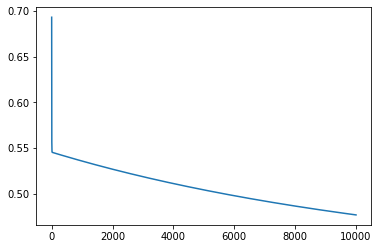

In [ ]:
plt.plot(np.arange(iterations), J_list)
plt.show()

In [ ]:
def accuracy(X, Y, W, B):

    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    A = A > 0.5

    A = np.array(A, dtype = 'int64')

    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

    print("Accuracy of the model is : ", round(acc, 2), "%")


In [ ]:
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  81.83 %
